In [18]:
#Imports
import os
from IPython.display import display, Math, Latex, Image
import matplotlib.pyplot as plt
import numpy as np

In [20]:
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (14.0, 6.0)
pictures = os.listdir('cutes')

Populating the interactive namespace from numpy and matplotlib


# Agenda
1. Matematyczny model neuronu
2. Model neuronu a regresja logistyczna
3. Modelowanie bramek logicznych
4. Problemy liniowo separowalne
5. Perceptron
6. Algorytm propagacji w przód
7. Algorytm propagacji wstecznej
8. Przykład praktyczny

# Matematyczny model neuronu (Neuron McCullocha-Pittsa)

Oczywiście istnieje mnóstwo różnych modeli neuronów, o różnym stopniu złożoności, skoncentrujmy się jednak na najprostszym.

Na wejście neuronu podajemy wartości liczbowe (liczby rzeczywiste) lub logiczne (Prawda/Fałsz - Zajście lub brak zajścia danego zdarzenia).
Każde z wejść (zdarzeń) ma swoją wagę. Im większa waga zdarzenia, tym większy wpływ danego zdarzenia na wyjście neuronu.
Warto zauważyć, że waga zdarzenia może być ujemna, co oznacza, że pewne zdarzenia zmniejszają wartość wynikową.
Każde ze zdarzeń zostaje przemnożone przez swoją wagę, a następnie wszystko zostaje zsumowane.
Następnie wynik liczbowy trafia na funkcje aktywacji, jeśli funkcja ta zwraca tylko wartości 0 i 1, nasz matematyczny model zachowuje się jak biologiczny neuron, reagując lub nie. Nie ma jednak takiej konieczności. 

### Formalizując
* x - wektor wejściowy $x \in \mathbb{R}^n$ lub $x \in \{0, 1\}^n$
* w - wektor wag $w \in \mathbb{R}^n$
* Aktywacja neuronu: $s = w_0 + \sum \limits^n_{i=1} x_i w_i$
* Wyjście z neuronu: $f(s)$ gdzie f - funkcja aktywacji t. że. $f : \mathbb{R} \rightarrow \mathbb{R}$ lub $f : \mathbb{R} \rightarrow (0, 1)$ lub $f : \mathbb{R} \rightarrow \{0, 1\}$

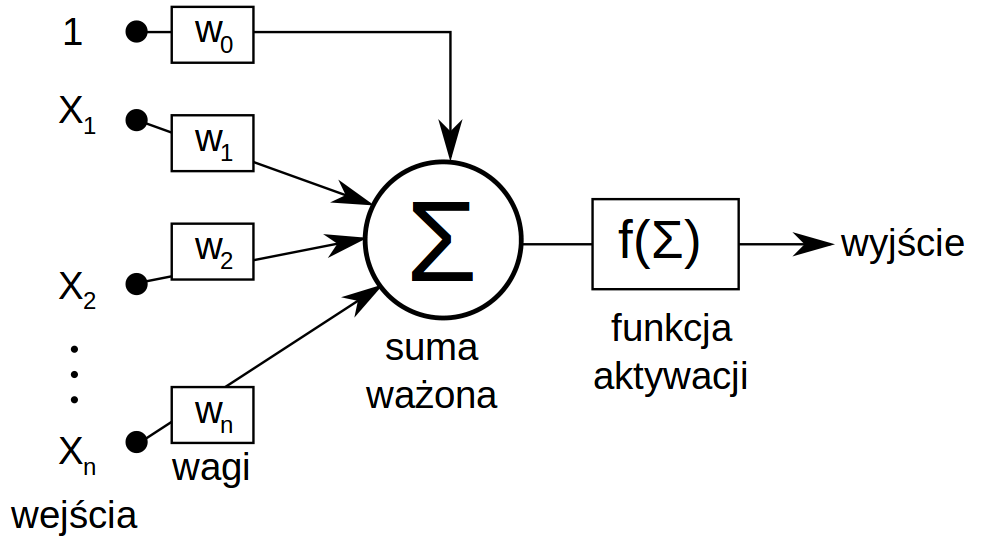

In [21]:
Image('images/Neuron_McCullocha-Pittsa.png')

## Funkcja aktywacji
Oczywiście funkcji aktywacji jest mnóstwo, każda ma swoje dobre i złe strony.
### Najprościej
$$  g(x) = \left\{
  \begin{array}{l l}
    1 & \quad \text{jesli $\Theta^TX > 0$}\\
    0 & \quad \text{jesli $\Theta^TX < 0$}
  \end{array} \right.
  $$


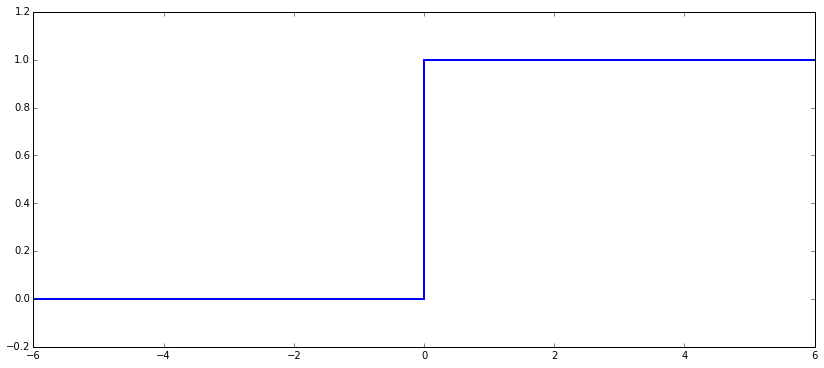

In [22]:
plt.plot([-6, 0], [0, 0], 'b', lw=2)
plt.plot([0, 0], [-0.001, 1.001], 'b', lw=2) # Mała sztuczka, poprawiająca estetyke wykresu :) 
plt.plot([0, 6], [1, 1], 'b', lw=2)
plt.show()

### Funkcja sigmoidalna

$$g(z) = \frac{1}{1+e^{-z}}$$


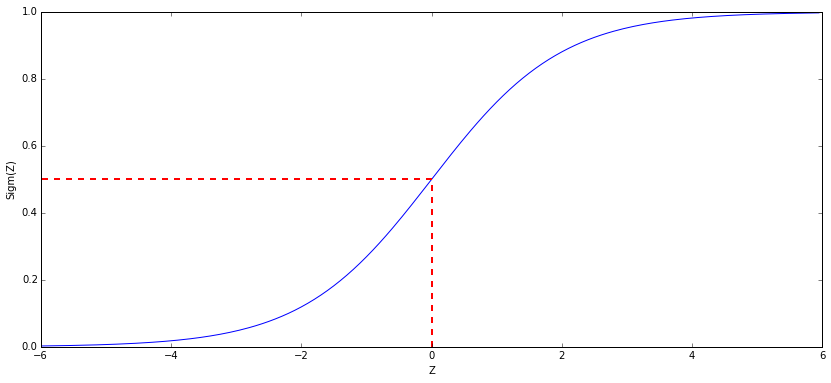

In [23]:
sigmoid = lambda x: 1.0 / (1 + np.exp(-x))
z = np.arange(-6, 6, 0.05)
y = [sigmoid(x) for x in z]
plt.plot(z, y)
plt.plot([0, -6], [0.5, 0.5], 'r--', lw=2)
plt.plot([0, 0], [0, 0.5], 'r--', lw=2)
plt.ylabel('Sigm(Z)')
plt.xlabel('Z')
plt.show()

## Neuron to inny sposób myślenia o regresji logistycznej!
Łatwo zorientować się (choćby po wzorach matematycznych), że neuron ( McCullocha-Pittsa) to nic innego, jak trochę inny sposób myślenia o regresji logistycznej z hipotezą liniową. Oczywiście są inne modele neuronów, ale dziś rozmawiamy wyłącznie o tym najbardziej klasycznym.

Jak wiemy, liniowa regresja logistyczna dzieli przestrzeń na dwie półprzestrzenie, klasyfikując każdy z punktów na danej podprzestrzeni jako należący do danej kategorii. Pojedynczy neuron robi dokładnie to samo (przy odpowiednio zadanej funkcji aktywacji)

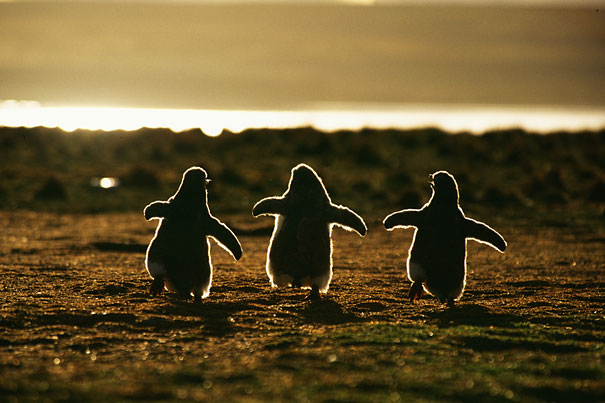

In [19]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

### Neurony umożliwiają "podejmowanie decyzji". 

Neuron daje nowe światło na problem regresji, i nadaje nową interpretację znanym nam już zjawiskom. Wygodnie jest myśleć o neuronie jako o jednostce do podejmowania decyzji.
Zamodelujmy dla przykładu problem podjęcia decyzji na temat tego, czy student powinien mieć zaliczony przedmiot czy nie. 
Decyzję uzależnijmy od zdania/nie zdania dwóch kolokwiów, oddania projektu zaliczeniowego i przekroczenia dozwolonej liczby nieusprawiedliwionych nieobecności na zajęciach.

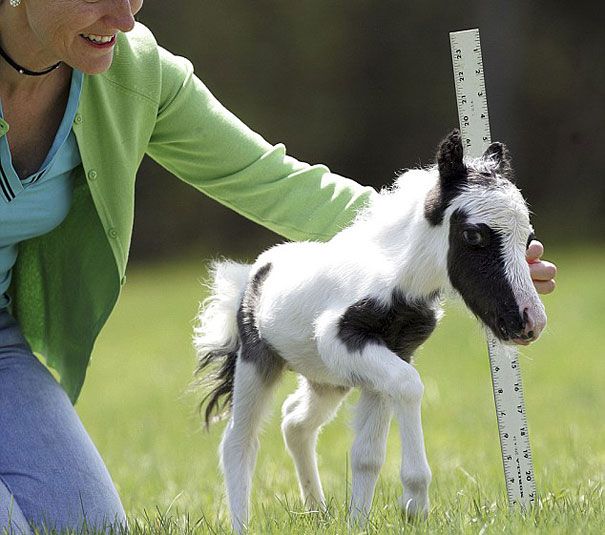

In [20]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

## Modelowanie bramek logicznych przy użyciu pojedyńczego neuronu
Zamodelujmy wspólnie bramkę logiczną AND, dla przypomnienia jej tabela prawdy:

| $x_1$ |$x_2$ | y |
| ----- | ---- | - |
|   0   |   0  | 0 |
|   0   |   1  | 0 |
|   1   |   0  | 0 |
|   1   |   1  | 1 |

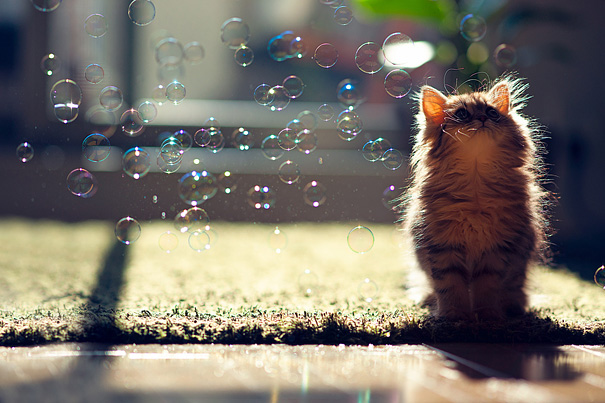

In [24]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

## Modelowanie Bramki XOR
Idźmy teraz o krok dalej, i spróbujmy z bramką XOR


| $x_1$ |$x_2$ | y |
| ----- | ---- | - |
|   0   |   0  | 1 |
|   0   |   1  | 0 |
|   1   |   0  | 0 |
|   1   |   1  | 1 |

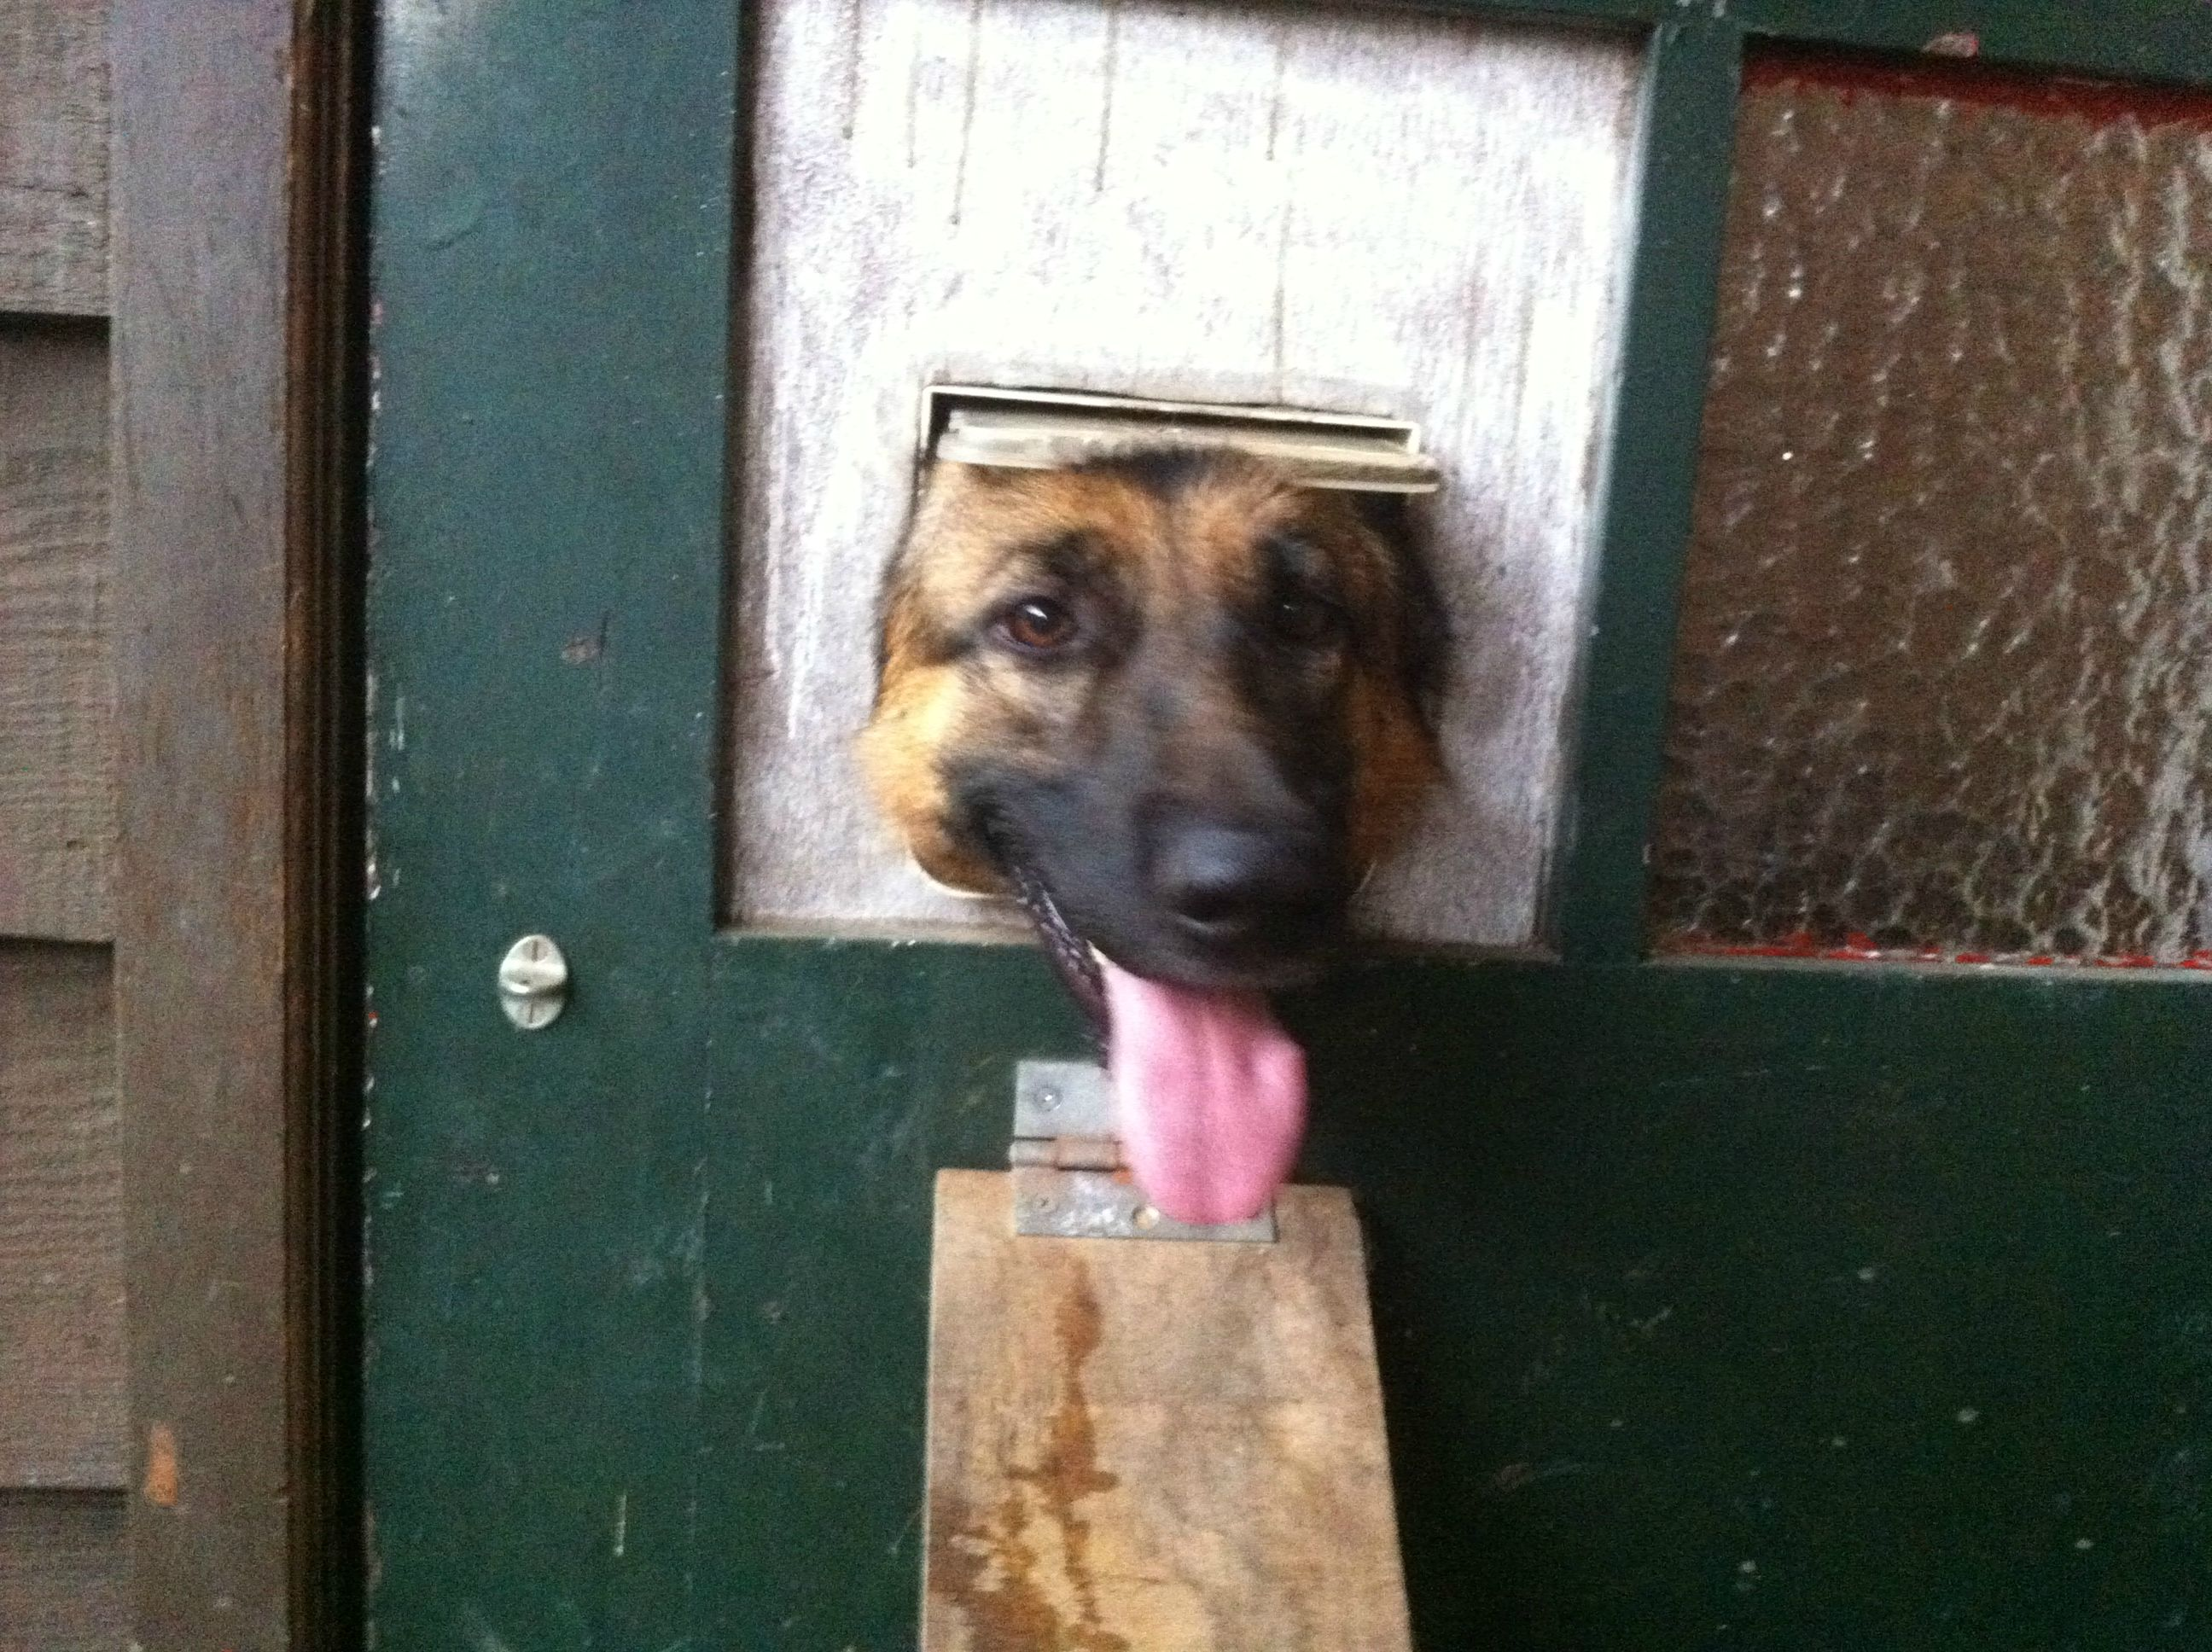

In [24]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

## Dlaczego się nie udało, czyli liniowa separowalność problemów
Problem nie jest liniowo separowalny, gdy nie da się oddzielić dwóch grup (klastrów) przy pomocy jednej hipierpłaszczyzny. Okazuje się wtedy, że jeden neuron nie wystarcza do rozwiązania problemu.
Rysunek poniżej wizualizuje problem XOR, Widać wyraźnie, że niemożliwym jest podzielenie płaszczyzny na dwie półpłaszczyzny, przy pomocy prostej w taki sposób, by na jednej półpłaszczyźnie leżały wyłącznie kropki czerwone, a na drugiej niebieskie.
Oznacza to, że problem XOR nie jest liniowo separowalny, czyli pojedynczym neuronem (regresją o hipotezie liniowej) rozwiązać się go nie da. 

Odkrycie tego ograniczenia matematycznego modelu neuronu, zatrzymało rozwój tej gałęzi systemów AI na prawie 40 lat !

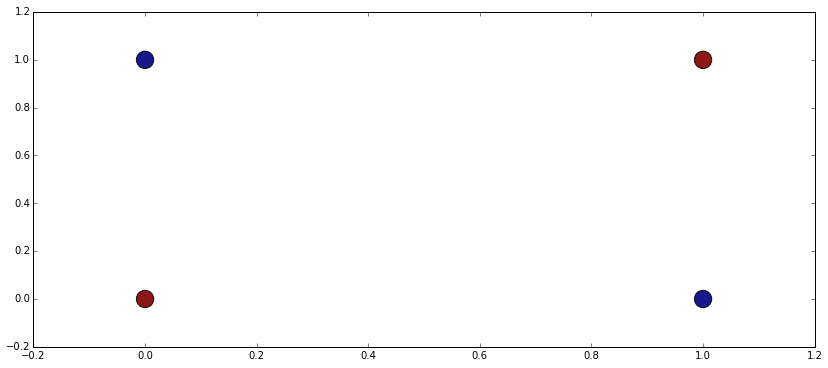

In [24]:
x = [0, 0, 1, 1 ]
y = [0, 1, 0, 1 ]
colors = [1, 0, 0, 1]

plt.scatter(x, y, s = 300,  c=colors, alpha=0.9)
plt.show()

# Perceptron
Rozwiązanie powyższego problemu nasuwa się samo, użyjmy więcej niż jednego neuronu!
Takie rozwiązanie, złożone z warstwy wejściowej (wartości wektora x), jednej warstwy ukrytej, i jednego bodź wielu neuronów warstwy wyjściowej nazywamy perceptronem. 

Problem XOR można łatwo rozwiązać przy pomocy trzech neuronów, dwóch w warstwie ukrytej, i jednego w warstwie wyjściowej.
Zróbmy to!


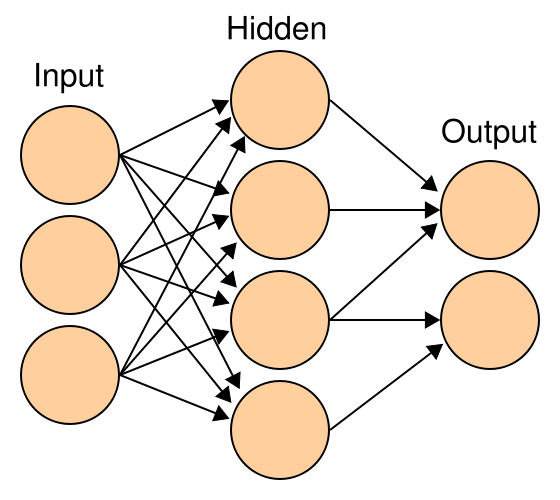

In [28]:
Image('images/perceptron.png')

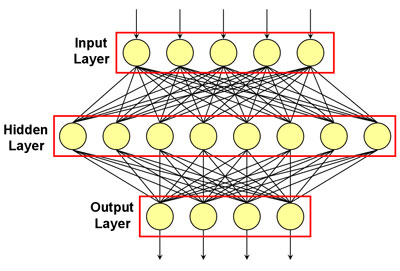

In [29]:
Image('images/perceptron.jpg')

## Forward propagation
W przypadku takiej struktury, rodzi się pytanie jak dokonywać predykcji przy pomocy takiego systemu AI.
DO rozwiązania tego problemu służy algorytm forward propagatiion
* Wektor wejściowy traktujemy jako warstwę wejściową.
* Dla warstw ukrytych liczymy iloczyn skalarny warstwy wejściowej i wektora wag warstwy kolejnej
* Dla każdego z wektorów przepuszczamy wartość przez funkcje aktywacji
* Ostatnia warstwa powinna dać w wyniku oczekiwaną przez nas liczbę.
### Implementacja

In [ ]:
    def predict(self, x): # forward propagation
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=1) # doklejam jedynki (bias)
        for l in range(0, len(self.weights)): # dla kazdej z warstw
            a = self.activation(np.dot(a, self.weights[l]))
        return a

# Jak uczyć sieć neuronową?
Najprościej - metodą back propagation
Ideologicznie jest to uogólnienie metody optymalnego spadku gradientu, nic nie stoi na przeszkodzie, żeby przedstawić problem uczenia sieci jako minimalizacje funkcji kosztu uzależnionej od wartości wektora wagowego. Sprawa się jednak komplikuje dla warstw ukrytych, przecież nie wiemy jaka powinna być wartość na przedostatniej warstwie! Dlatego algorytmy polega na "podciąganiu" wektora wag do takiej wartości, w której błąd predykcji dla warstwy kolejnej się minimalizuje.

## Backpropagation
Dla każdej z epok:
* Wybierz (wylosuj) dane uczące (jedno wejście i wyjście)
* Przeprowadź forward propagation, zapamiętaj wyniki w macierzy a w taki sposób, że $a^{(1)} = $ wektor x oraz $a^{(L)} =$ warstwa ostatnia
* Policz błąd dla warstwy ostatniej ze wzoru $\delta^{(L)} = a^{(L)} - y^{(i)}$ czyli od bieżącej predykcji odejmij wartość spodziewaną
* Dla każdej warstwy ukrytej oblicz $\delta^{(k-1)} = (\Theta^{(k-1)})^T \delta^{(k)} \cdot g'(z^{(k-1)})$

gdzie:

$\Theta$ - wektor wag

$g'(x)$ pochodna funkcji aktywacji, jeśli funkcja aktywacji to sigmoid wtedy = $a^{(k-1)} \cdot (1 -a^{(k-1))}$
* Zapamiętaj wartość błędu, żeby skorygować $\Delta^{(L)} = \Delta^{(L)} + \delta^{(L+1)} \cdot (a^{(i)})^T$
* Po wszystkim skoryguj wagi, dodając od nich wektor $\Delta$ przemnożony przez stałą uczenia

Najwygodniej będzie zrozumieć algorytm analizując poniższy kod, jest w nim kilka drobnych różnic w porównaniu do wersji pierwotnej, ale wychodzi mniej więcej na to samo.
##Implementacja sieci neuronowej z algorytmem backpropagation

In [25]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
        self.weights = []
        #inicjalizuje wagi jako liczby z przedzialu (-1, 1)
        for i in range(1, len(layers) - 1): # dla warstw ukrytych 
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r) # dla warstwy wyjsciowej

    def fit(self, X, y, learning_rate=0.2, epochs=200000):
        ones = np.atleast_2d(np.ones(X.shape[0])) # warstwa z jedynkami
        X = np.concatenate((ones.T, X), axis=1) # dodawanie progu (bias)
        for k in range(1, epochs): # iteruje po epokach, 
            if k % 10000 == 0: print 'epochs:', k
            
            i = np.random.randint(X.shape[0]) # wybieram losowo jeden rekord ze zbioru uczacego
            a = [X[i]]

            for l in range(len(self.weights)): # forward propagation
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # blad dla warstwy wyjsciowej
            error = y[i] - a[-1] # 
            deltas = [error * self.activation_prime(a[-1])]

            # propagujemy blad od warstwy dwa do przedostatniej
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # bledy trzeba odwrocic
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation

            for i in range(len(self.weights)): # popraw wagi wszystkich warstw
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x): # forward propagation
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=1)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2, 2, 1])

    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    print 'Result:'
    for e in X:
        print "x: {}   {} |  Predicted: {}".format(e[0], e[1], nn.predict(e)[0])

epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
epochs: 100000
epochs: 110000
epochs: 120000
epochs: 130000
epochs: 140000
epochs: 150000
epochs: 160000
epochs: 170000
epochs: 180000
epochs: 190000
Result:
x: 0   0 |  Predicted: 2.87329858661e-06
x: 0   1 |  Predicted: 0.998040254778
x: 1   0 |  Predicted: 0.996958663164
x: 1   1 |  Predicted: -0.00614244090311


# Dzięki za uwagę!

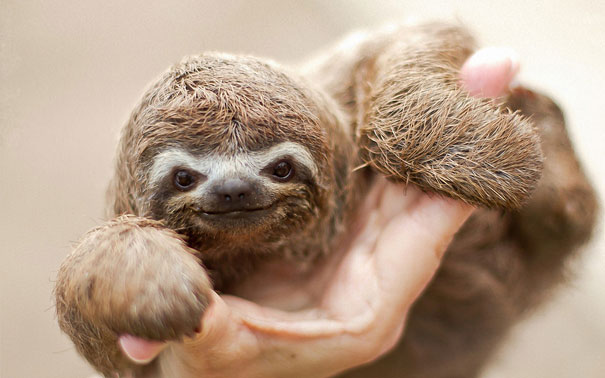

In [26]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))